Imports

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


Load datasets 


In [2]:


train_df = pd.read_csv(r'C:\Users\MSI\Videos\Downloads\archive\CICIOT23\train\train.csv')
test_df = pd.read_csv(r'C:\Users\MSI\Videos\Downloads\archive\CICIOT23\test\test.csv')
val_df = pd.read_csv(r'C:\Users\MSI\Videos\Downloads\archive\CICIOT23\validation\validation.csv')

# Print shapes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Validation shape:", val_df.shape)

# Merge all datasets
full_df = pd.concat([train_df, test_df, val_df], axis=0, ignore_index=True)

print("Merged dataset shape:", full_df.shape)

Train shape: (5491971, 47)
Test shape: (1176851, 47)
Validation shape: (1176851, 47)
Merged dataset shape: (7845673, 47)


Display Dadaset

In [3]:

full_df.head(20)


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,757.00,6.00,64.00,23.671858,23.671858,0.0,0.0,0.0,0.0,...,538.470740,944.00,8.334058e+07,9.5,41.845546,761.456760,305219.322301,0.95,141.55,DDoS-ACK_Fragmentation
1,0.000000,54.00,6.00,64.00,2.393046,2.393046,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309327e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
2,0.033982,56.78,6.11,64.64,1.192715,1.192715,0.0,0.0,0.0,0.0,...,1.727526,54.29,8.333086e+07,9.5,10.462813,2.445286,16.853118,0.19,141.55,DDoS-PSHACK_Flood
3,0.000000,0.00,47.00,64.00,9.841972,9.841972,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.370278e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,Mirai-greeth_flood
4,3.944828,108.00,6.00,64.00,0.506993,0.506993,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.297270e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
5,0.000000,0.00,1.00,64.00,42.556060,42.556060,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312470e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
6,0.000000,0.00,1.00,64.00,2.183256,2.183256,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315031e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
7,0.000000,54.00,6.00,64.00,1.883594,1.883594,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307231e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
8,0.000000,54.00,6.00,64.00,4.711073,4.711073,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309438e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
9,0.000000,0.00,1.00,64.00,4.686491,4.686491,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315005e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


In [4]:
full_df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491971 entries, 0 to 5491970
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [7]:
# Overview of dataset
full_df.info()

# Summary statistics
full_df.describe().T.head(10)

# Check missing values
missing = full_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845673 entries, 0 to 7845672
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [10]:
full_df['label']

0           DDoS-ACK_Fragmentation
1                   DDoS-SYN_Flood
2                DDoS-PSHACK_Flood
3               Mirai-greeth_flood
4                    DoS-SYN_Flood
                    ...           
7845668    DDoS-SynonymousIP_Flood
7845669          DDoS-PSHACK_Flood
7845670             DDoS-SYN_Flood
7845671             DDoS-TCP_Flood
7845672          DDoS-PSHACK_Flood
Name: label, Length: 7845673, dtype: object

Label distribution 

In [12]:
full_df.max()


flow_duration          99435.761782
Header_Length             9905298.5
Protocol Type                  47.0
Duration                      255.0
Rate                      8388608.0
Srate                     8388608.0
Drate                     28.055545
fin_flag_number                 1.0
syn_flag_number                 1.0
rst_flag_number                 1.0
psh_flag_number                 1.0
ack_flag_number                 1.0
ece_flag_number                 1.0
cwr_flag_number                 1.0
ack_count                       5.7
syn_count                     12.61
fin_count                     82.43
urg_count                    4167.7
rst_count                    9586.5
HTTP                            1.0
HTTPS                           1.0
DNS                             1.0
Telnet                          0.0
SMTP                            1.0
SSH                             1.0
IRC                             0.0
TCP                             1.0
UDP                         

In [13]:
full_df.min()

flow_duration                   0.0
Header_Length                   0.0
Protocol Type                   0.0
Duration                        0.0
Rate                            0.0
Srate                           0.0
Drate                           0.0
fin_flag_number                 0.0
syn_flag_number                 0.0
rst_flag_number                 0.0
psh_flag_number                 0.0
ack_flag_number                 0.0
ece_flag_number                 0.0
cwr_flag_number                 0.0
ack_count                       0.0
syn_count                       0.0
fin_count                       0.0
urg_count                       0.0
rst_count                       0.0
HTTP                            0.0
HTTPS                           0.0
DNS                             0.0
Telnet                          0.0
SMTP                            0.0
SSH                             0.0
IRC                             0.0
TCP                             0.0
UDP                         

Plot distributions of a few continuous features


C:\Users\MSI\AppData\Local\Temp\ipykernel_23888\312460689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=train_df, order=order, palette='coolwarm')


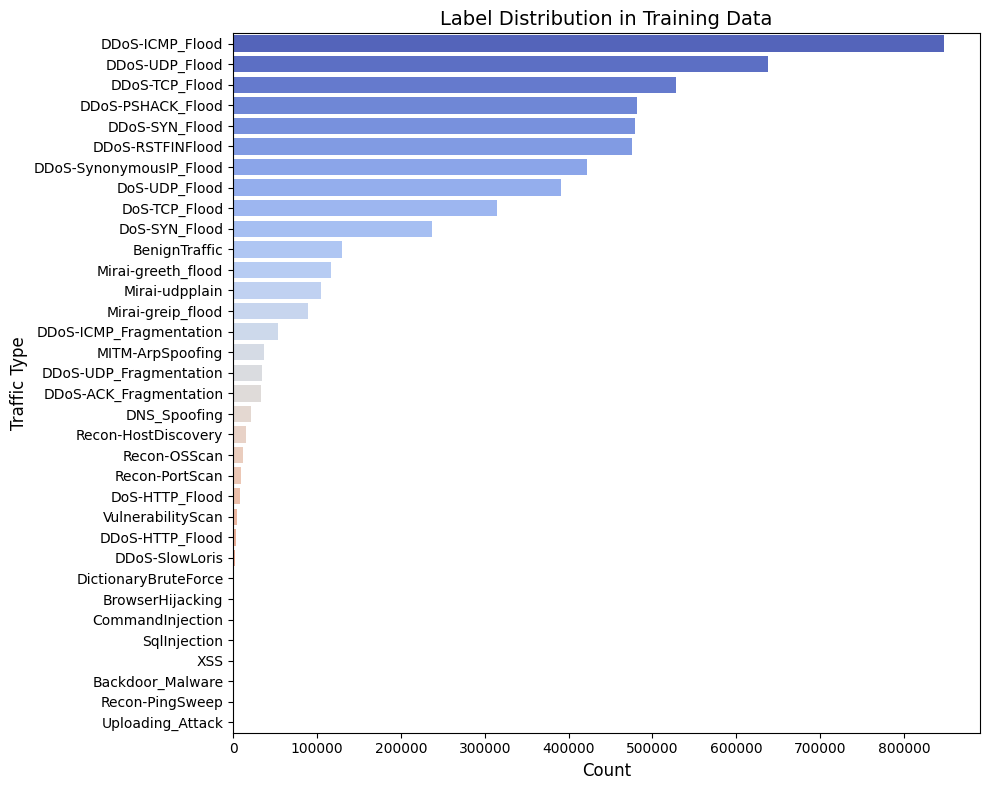

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10,8))
order = train_df['label'].value_counts().index  # sort by frequency

sns.countplot(y='label', data=train_df, order=order, palette='coolwarm')

plt.title('Label Distribution in Training Data', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Traffic Type', fontsize=12)
plt.tight_layout()
plt.show()


Plot distributions of a few continuous features


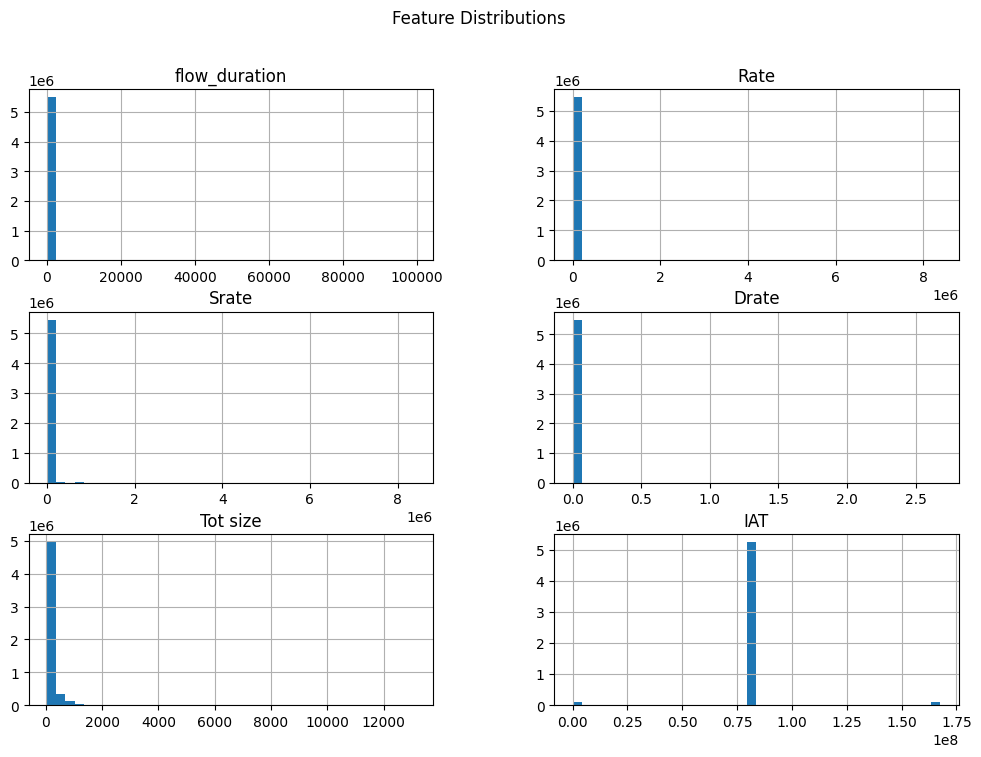

flow_duration: 1035281 outliers
Rate: 1208555 outliers
Srate: 1208555 outliers
Drate: 304 outliers
Tot size: 1690105 outliers
IAT: 329552 outliers


In [ ]:
num_features = ['flow_duration', 'Rate', 'Srate', 'Drate', 'Tot size', 'IAT']
train_df[num_features].hist(bins=40, figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

# Detect potential outliers
for col in num_features:
    q1, q3 = np.percentile(train_df[col], [25, 75])
    iqr = q3 - q1
    outliers = ((train_df[col] < (q1 - 1.5 * iqr)) | (train_df[col] > (q3 + 1.5 * iqr))).sum()
    print(f"{col}: {outliers} outliers") 

Features distribution by Label 

C:\Users\MSI\AppData\Local\Temp\ipykernel_23888\2710518925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label', x='Rate', data=train_df, palette='Set2')


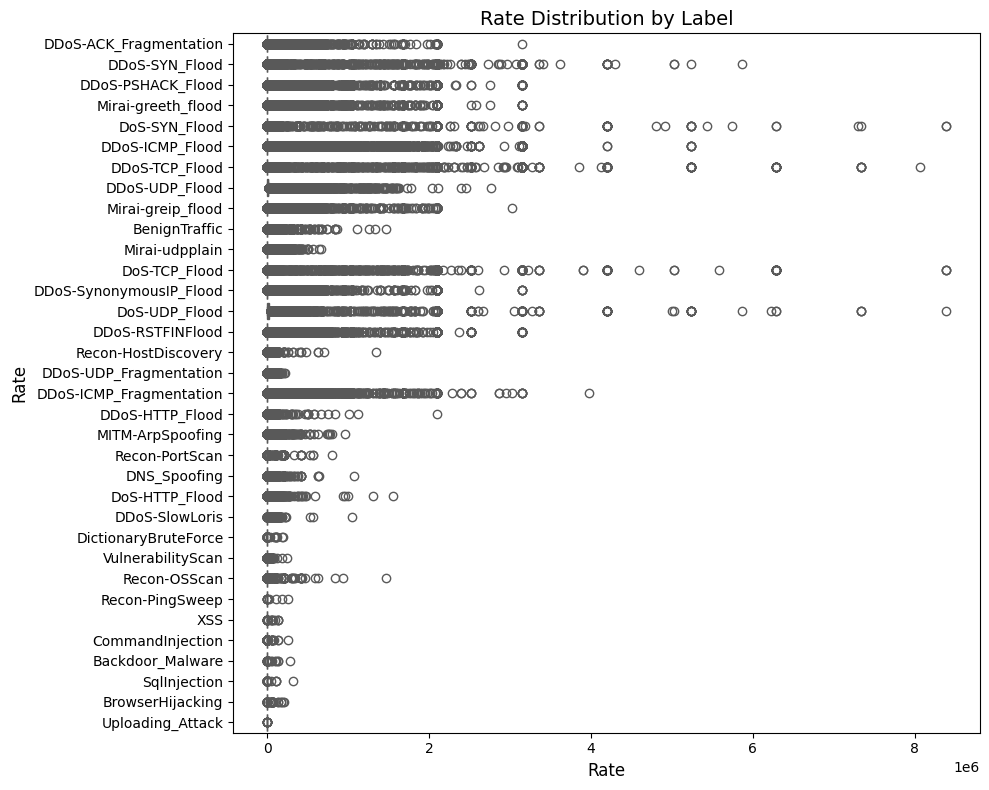

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Horizontal Boxplot ---
plt.figure(figsize=(10,8))
sns.boxplot(y='label', x='Rate', data=train_df, palette='Set2')
plt.title('Rate Distribution by Label', fontsize=14)
plt.xlabel('Rate', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_23888\2895362563.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label', x='Min', data=train_df, palette='Set2')


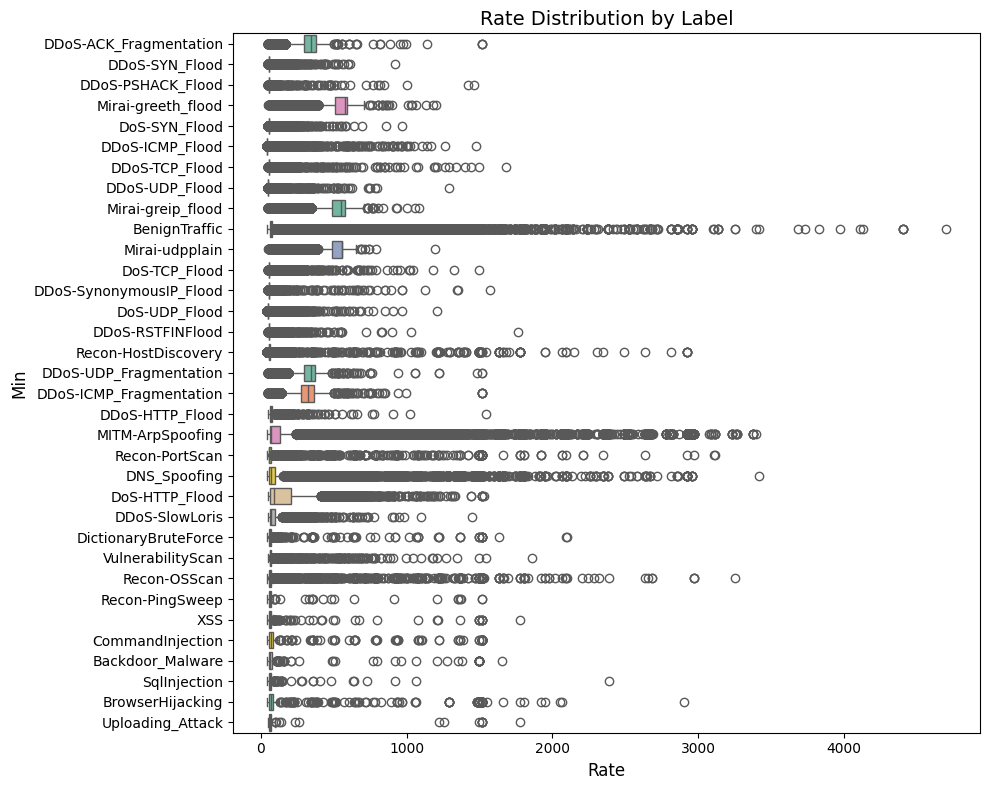

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Horizontal Boxplot ---
plt.figure(figsize=(10,8))
sns.boxplot(y='label', x='Min', data=train_df, palette='Set2')
plt.title('Rate Distribution by Label', fontsize=14)
plt.xlabel('Rate', fontsize=12)
plt.ylabel('Min', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_23888\4196671042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label', x='flow_duration', data=train_df, palette='Set2')


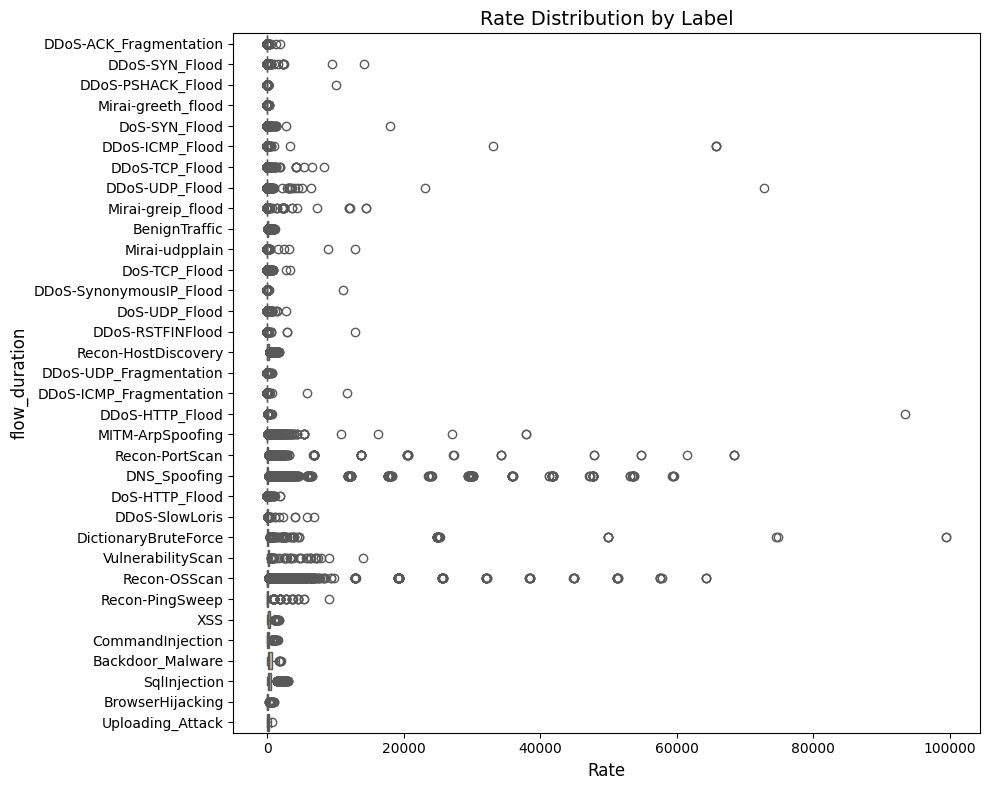

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Horizontal Boxplot ---
plt.figure(figsize=(10,8))
sns.boxplot(y='label', x='flow_duration', data=train_df, palette='Set2')
plt.title('Rate Distribution by Label', fontsize=14)
plt.xlabel('Rate', fontsize=12)
plt.ylabel('flow_duration', fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
# Check unique labels first
print("Unique labels in the dataset:")
print(full_df['label'].unique())

Unique labels in the dataset:
['DDoS-ACK_Fragmentation' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood'
 'Mirai-greeth_flood' 'DoS-SYN_Flood' 'DDoS-ICMP_Flood' 'DDoS-TCP_Flood'
 'DDoS-UDP_Flood' 'Mirai-greip_flood' 'BenignTraffic' 'Mirai-udpplain'
 'DoS-TCP_Flood' 'DDoS-SynonymousIP_Flood' 'DoS-UDP_Flood'
 'DDoS-RSTFINFlood' 'Recon-HostDiscovery' 'DDoS-UDP_Fragmentation'
 'DDoS-ICMP_Fragmentation' 'DDoS-HTTP_Flood' 'MITM-ArpSpoofing'
 'Recon-PortScan' 'DNS_Spoofing' 'DoS-HTTP_Flood' 'DDoS-SlowLoris'
 'DictionaryBruteForce' 'VulnerabilityScan' 'Recon-OSScan'
 'Recon-PingSweep' 'XSS' 'CommandInjection' 'Backdoor_Malware'
 'SqlInjection' 'BrowserHijacking' 'Uploading_Attack']


In [33]:
# Create a new binary column
full_df['attack'] = full_df['label'].apply(lambda x: 0 if x == 'BenignTraffic' else 1)

# Show value counts
print("\nLabel distribution after binary mapping:")
print(full_df['attack'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt




Label distribution after binary mapping:
attack
1    7660907
0     184766
Name: count, dtype: int64



Label distribution after binary mapping:
attack
1    7660907
0     184766
Name: count, dtype: int64


C:\Users\MSI\AppData\Local\Temp\ipykernel_23888\2807842965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack', data=full_df, palette=['green', 'red'])


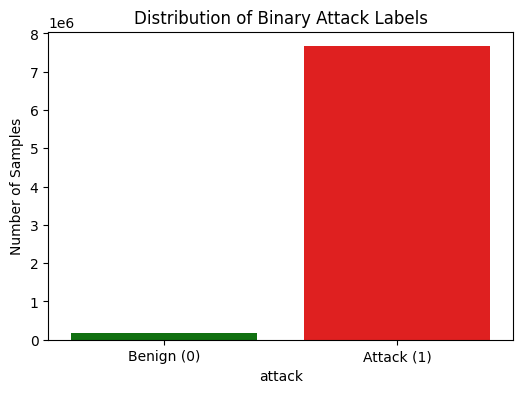

In [ ]:


# Show value counts
print("\nLabel distribution after binary mapping:")
print(full_df['attack'].value_counts())

# Plot distribution
plt.figure(figsize=(6,4))
sns.countplot(x='attack', data=full_df, palette=['green', 'red'])
plt.xticks([0,1], ['Benign (0)', 'Attack (1)'])
plt.title('Distribution of Binary Attack Labels')
plt.ylabel('Number of Samples')
plt.show()
